In [32]:
import pandas as pd

In [33]:
a = pd.read_csv("test_energies_t0_extrap0.csv", index_col=0)
b = pd.read_csv("test_simulation_energies_out.csv", index_col=0).reset_index(drop=True)


In [34]:
x = a.join(b)

In [35]:
b

,time,potential_energy,acc_ratio_trans,acc_ratio_rot,acc_ratio_vol,bind,mindist,weight
0,10000,-0.750941,0.202,0.567,0.0,0,1,362.155
1,20000,-0.696701,0.202,0.566,0.0,0,1,362.155
2,30000,-0.578848,0.203,0.569,0.0,0,1,362.155
3,40000,-0.835677,0.203,0.570,0.0,0,1,362.155
4,50000,-0.610528,0.203,0.568,0.0,0,1,362.155
...,...,...,...,...,...,...,...,...
995,960000,-0.354268,0.204,0.577,0.0,0,1,362.155
996,970000,-0.619208,0.204,0.577,0.0,0,0,362.155
997,980000,-0.856417,0.204,0.577,0.0,0,1,362.155
998,990000,-0.643960,0.204,0.577,0.0,0,1,362.155


In [ ]:
x = x.assign(scaled_energy = x["energies_T0"] / 12.0)
x = x.assign(diff = x["scaled_energy"] - x["potential_energy"])
x.sort_values("diff")[["scaled_energy", "potential_energy", "diff"]]
b

,scaled_energy,potential_energy,diff
289,0.028298,-0.237506,0.265804
495,0.028619,-0.354268,0.382887
395,0.028619,-0.354268,0.382887
95,0.028619,-0.354268,0.382887
795,0.028619,-0.354268,0.382887
...,...,...,...
636,0.070851,-1.410503,1.481354
200,0.034737,-1.450330,1.485067
232,0.079001,-1.406795,1.485796
242,0.101761,-1.391673,1.493434


np.float64(0.10092984182524568)

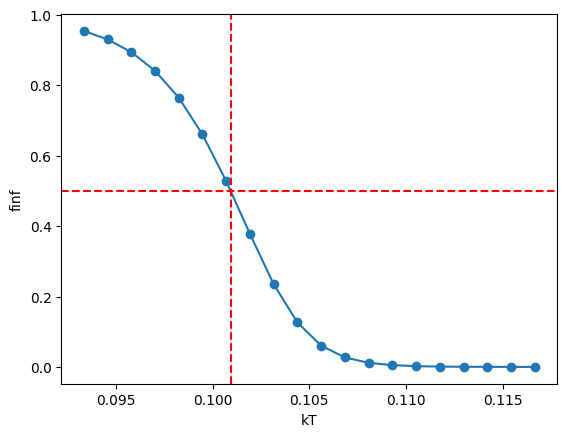

In [1]:
from matplotlib import pyplot as plt
import numpy as np

from jax_dna.utils.units import get_kt
temps = [0.09333333, 0.0945614,  0.09578947, 0.09701754, 0.09824561, 0.09947368,
 0.10070175, 0.10192982, 0.10315789, 0.10438596, 0.10561404, 0.10684211,
 0.10807018, 0.10929825, 0.11052632, 0.11175439, 0.11298246, 0.11421053,
 0.1154386,  0.11666667]
curve_finf = np.array([9.54661208e-01, 9.30589100e-01, 8.94485689e-01, 8.41267687e-01,
 7.64995709e-01, 6.60578535e-01, 5.27863030e-01, 3.77845592e-01,
 2.35185564e-01, 1.26478977e-01, 6.05169415e-02, 2.70268531e-02,
 1.17361152e-02, 5.08819979e-03, 2.24055667e-03, 1.01612059e-03,
 4.81753103e-04, 2.43235060e-04, 1.33714983e-04, 8.17874679e-05])
plt.plot(temps, curve_finf, marker='o')

sort_idx = np.argsort(curve_finf)
kt_sorted = np.array(temps)[sort_idx]
c_sorted = curve_finf[sort_idx]
iterped = np.interp(0.5, c_sorted, kt_sorted)
plt.axhline(0.5, c='r', linestyle='--')
plt.axvline(iterped, c='r', linestyle='--')
plt.xlabel("kT")
plt.ylabel("finf")
iterped

In [11]:
import pandas as pd
d = pd.read_csv("xout.csv", header=None)
d = d.loc[:23]

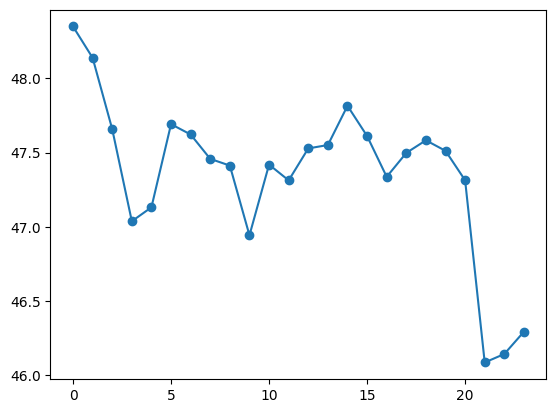

In [12]:
from matplotlib import pyplot as plt
plt.plot(d[0], d[1], marker='o')

In [1]:
from jax_dna.input.topology import from_oxdna_file
from jax_dna.input.trajectory import from_file


top = from_oxdna_file("full_traj.top")
traj = from_file("full_traj.dat", strand_lengths=top.strand_counts, is_oxdna=False)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
/data-ceph/arik/mythos/jax_dna/input/topology.py:242: UserWarning: Type of strand 1 not specified, and did not find T/U for autodetect
  warnings.warn(WARN_CLASSIC_UNSPECIFIED_NT_TYPE.format(strand_idx=i), stacklevel=1)


In [ ]:
traj.length()

In [2]:
from jax_dna.simulators.io import SimulatorTrajectory


sim_traj = SimulatorTrajectory(rigid_body = traj.state_rigid_body)

In [23]:
import functools
from jax_dna.energy.dna1 import Nucleotide, default_configs
from jax_dna.observables.base import get_duplex_quartets
from jax_dna.observables.persistence_length import PersistenceLength
from jax_md import space

test_geometry = default_configs()[1]["geometry"]
transform_fn = functools.partial(
        Nucleotide.from_rigid_body,
        com_to_backbone=test_geometry["com_to_backbone"],
        com_to_hb=test_geometry["com_to_hb"],
        com_to_stacking=test_geometry["com_to_stacking"],
    )
displacement_fn, _ = space.free()
quartets = get_duplex_quartets(int(top.n_nucleotides / 2))

lp = PersistenceLength(rigid_body_transform_fn=transform_fn, quartets=quartets, displacement_fn=displacement_fn)

/data-ceph/arik/mythos/jax_dna/energy/dna1/__init__.py:39: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return jnp.array(x, dtype=jnp.float64)


In [24]:
import jax.numpy as jnp

output_all_corrs, output_all_l0_vals = lp.get_all_corrs_and_l0s(sim_traj, skip_ends=True)
mean_all_corrs = jnp.mean(output_all_corrs, axis=0)
mean_l0_val = jnp.mean(output_all_l0_vals, axis=0)

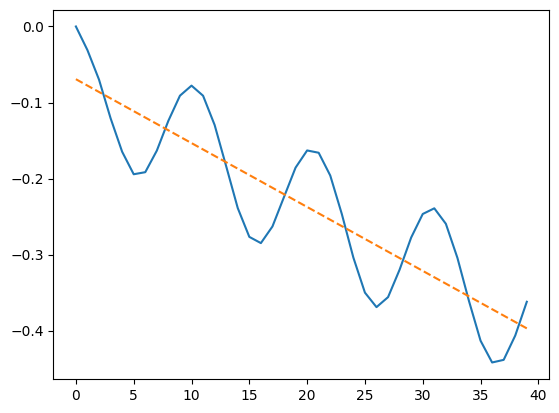

In [27]:
from matplotlib import pyplot as plt
from jax_dna.observables.persistence_length import persistence_length_fit

fit_lp, fit_lp_offset = persistence_length_fit(mean_all_corrs[:40], mean_l0_val)

def log_corr_fn(n: jnp.ndarray) -> jnp.ndarray:
        return -n * mean_l0_val / fit_lp + fit_lp_offset

plt.plot(jnp.log(mean_all_corrs[:40]))
plt.plot(log_corr_fn(jnp.arange(mean_all_corrs[:40].shape[0])), linestyle="--")

In [40]:
from pathlib import Path
from jax_dna.simulators.oxdna.utils import read_src_h


original = read_src_h(Path("../oxDNA/src/model.h"))
lp_step2 = read_src_h(Path("lp_step2_model.h"))

In [59]:
import numpy as np
import pandas as pd


records = []
for k, v in original.items():
    new_v = lp_step2.get(k, None)
    if isinstance(v, str):
        v = original[v]
    if isinstance(new_v, str):
        new_v = lp_step2[new_v]
    changed = False
    if not np.isclose(new_v, v):
        changed = True
        if v == 0:
            p = 0
        else:
            p = (new_v - v) / v * 100.0
    records.append({"parameter": k, "original": v, "new": new_v, "changed": changed, "percent_change": p})
df = pd.DataFrame.from_records(records)

In [63]:
pd.set_option("display.max_rows", None)
df.query("changed").sort_values("percent_change", key=abs, ascending=False)

,parameter,original,new,changed,percent_change
34,HYDR_BLOW,-126.243000,-92.394185,True,-26.812429
84,STCK_BLOW,-68.185700,-52.306365,True,-23.288365
88,STCK_RCLOW,0.232390,0.217141,True,-6.561642
67,HYDR_THETA7_B,17.052600,18.164902,True,6.522774
38,HYDR_RCLOW,0.276908,0.263814,True,-4.728507
57,HYDR_THETA3_B,4.160380,4.301591,True,3.394192
47,HYDR_THETA1_B,4.160380,4.032489,True,-3.074028
104,STCK_THETA6_B,3.893610,4.010282,True,2.996512
52,HYDR_THETA2_B,4.160380,4.050623,True,-2.638148
99,STCK_THETA5_B,3.893610,3.985744,True,2.366286
